![Texto alternativo](https://th.bing.com/th/id/OIP.vlilh4SbxOVKDv5f-q3FsgAAAA?pid=ImgDet&rs=1)

# <font color= lightblue> Proyecto de Ciencia de Datos </font>



*   Héctor César Ornelas León
*   Ricardo Damián Hernández Ramírez





# Detección de tumores cerebrales mediante Redes Neuronales Convolucionales

## Introducción
* La detección temprana y precisa de tumores cerebrales es de vital importancia en el campo de la medicina y la neurociencia ya que permite un tratamiento oportuno y más efectivo. Bajo este contexto, este proyecto tiene como objetivo entrenar una arquitectura de Redes Neuronales Convolucionales (CNN, por sus siglas en inglés) para interpretar imágenes de resonancia magnética y detectar patrones asociados a tumores cerebrales.

* La relevancia de esta iniciativa se fundamenta en la necesidad  de optimizar los métodos de detección y diagnóstico, especialmente en un contexto donde la complejidad de los tumores cerebrales demanda enfoques más avanzados. La aplicación de técnicas de inteligencia artificial, como las CNN, no solo busca mejorar la precisión de la clasificación, sino también agilizar la identificación de patologías y favorecer tratamientos más personalizados y oportunos.

* Para llevar a cabo este proyecto, se hará uso de  un conjunto de datos que incluye imágenes de resonancia magnética con cuatro clases distintas: Normal, Meningioma, Glioma y Pituitaria.


## Antecedentes

* Los tumores cerebrales son crecimientos anormales de células en el cerebro. La clasificación de tumores cerebrales en subtipos, como Meningioma, Glioma y Pituitaria es fundamental, ya que diferentes tumores requieren enfoques terapéuticos distintos.

* Según la Clínica Mayo, Los Meningiomas son los tumores cerebrales primarios más comunes, representando más del 30% de todos los casos. Los gliomas son un tipo de tumor que se origina en las células gliales, que son las que rodean y dan soporte a las neuronas. Los gliomas pueden afectar al funcionamiento del cerebro y la médula espinal, y su gravedad depende de su localizacióny tamaño, mientras que  los tumores Pituitarios son benignos, representando alrededor del 10% de los tumores cerebrales. (Tumor cerebral, Mayo Clinic, 2023).

* El conjunto de datos utilizado en este proyecto se obtuvo de [Kaggle](https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256/data)., una plataforma en línea que ofrece conjuntos de datos, competiciones y recursos relacionados con la ciencia de datos y el aprendizaje automático. Este conjunto de datos consta de aproximadamente 3,000 imágenes de resonancias magnéticas, las cuales se dividen en cuatro clases: Normal, Meningioma, Glioma y Pituitaria.



## Objetivos generales

* Desarrollar un modelo de Redes Neuronales Convolucionales (CNN) eficiente y preciso que pueda identificar de manera efectiva los patrones asociados a los diferentes tipos de tumores cerebrales en las imágenes de resonancia magnética.

## Objetivos específicos

* Recolectar un conjunto de datos de resonancias magnéticas de tumores cerebrales y realizar tareas de preprocesamiento como normalización para mejorar la calidad y diversidad del conjunto de entrenamiento.

* Seleccionar una arquitectura de Redes Neuronales Convolucionales (CNN) óptima para la detección de patrones asociados a diferentes tipos de tumores cerebrales.

* Evaluar el rendimiento del modelo utilizando métricas específicas para problemas de clasificación en imágenes médicas, como precisión, recall y F1-score.

* Implementar una API que permita ejecutar nuestro modelo como un servicio, facilitando así su accesibilidad y uso.

*  Crear una imagen de Docker que contenga el entorno necesario para ejecutar el modelo en diferentes instancias.



## Planteamiento del problema

* Los tumores cerebrales son muy complejos y se caracterizan por una amplia variabilidad en su tamaño y ubicación, lo que dificulta la comprensión completa de la naturaleza de estos tumores. Además, el análisis de resonancias magnéticas para su detección y diagnóstico requiere de la experiencia de un neurocirujano especializado.

* En muchos países en vías de desarrollo, la falta de médicos especializados y la falta de conocimiento sobre los tumores cerebrales dificultan la generación de informes a partir de resonancias magnéticas. Esto no solo ralentiza los procesos de diagnóstico y detección temprana, sino que también obstaculiza el acceso a una atención médica oportuna y efectia.

* Por lo tanto, existe una necesidad  de desarrollar soluciones que aprovechen la tecnología de la inteligencia artificial, como las Redes Neuronales Convolucionales (CNN), para asistir en la detección temprana y el diagnóstico preciso de tumores cerebrales a partir de imágenes de IRM. Esta innovación tiene el potencial de superar las limitaciones geográficas y de recursos, permitiendo un acceso más amplio a un diagnóstico oportuno y una atención médica eficaz para los pacientes con tumores cerebrales.


## EDA

In [ ]:
import os
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image


## Descomprimiendo el archivo .zip

In [ ]:
# Ruta del archivo ZIP
ruta_archivo_zip = 'Imagenes_proyecto.zip'

# Directorio
directorio_destino = 'img_proy_CD'
if not os.path.exists(directorio_destino):
    os.makedirs(directorio_destino)

# Extraer el archivo ZIP
with zipfile.ZipFile(ruta_archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)


## Visualización de ejemplos de imágenes por clase


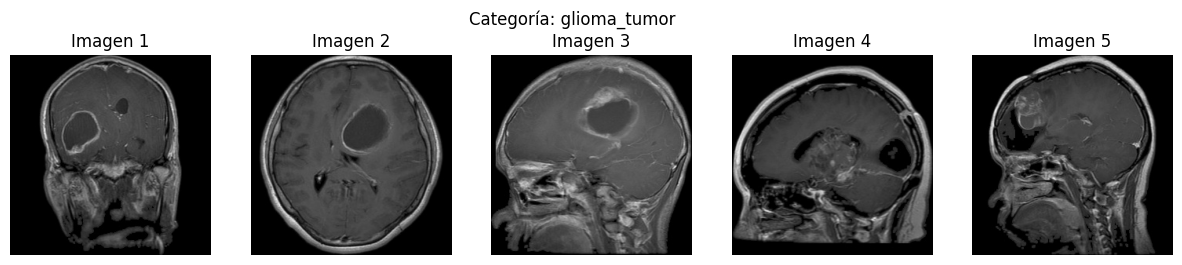

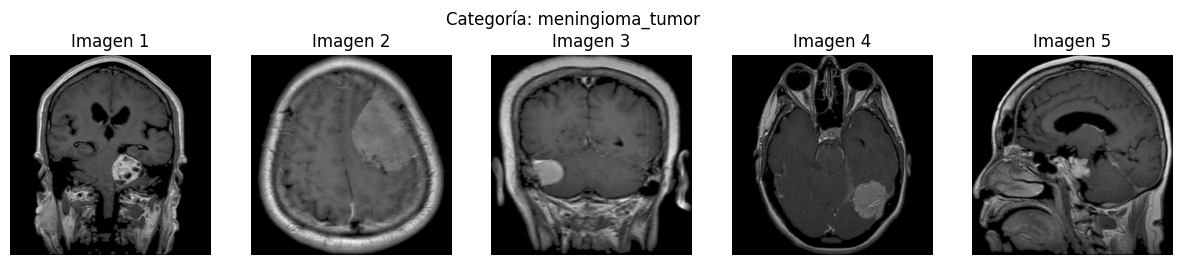

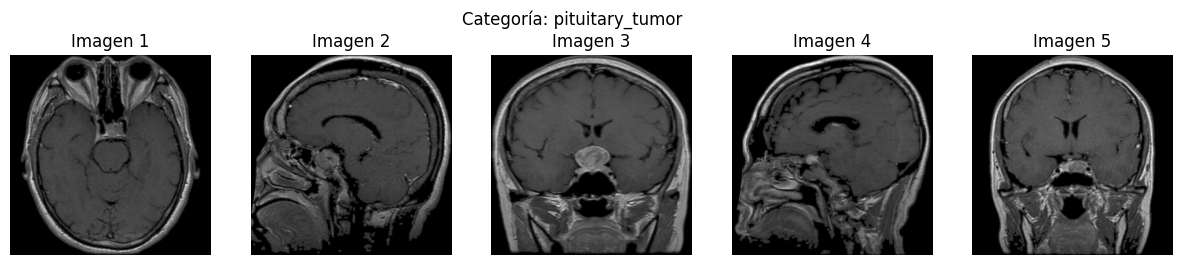

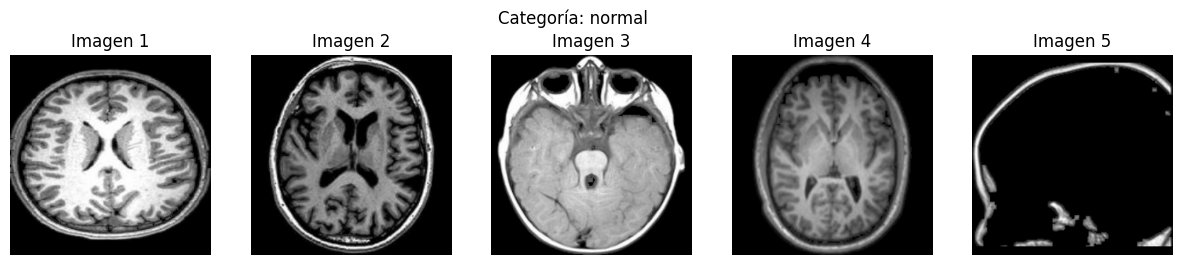

In [ ]:
directorio_principal = 'img_proy_CD/Data'
carpetas = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'normal']

# Mostrar 5 imágenes de cada clase
imagenes_por_clase = 5
for carpeta in carpetas:
    carpeta_ruta = os.path.join(directorio_principal, carpeta)
    nombres_archivos = os.listdir(carpeta_ruta)[:imagenes_por_clase]
    fig, axs = plt.subplots(1, imagenes_por_clase, figsize=(15, 3))

    for i, nombre_archivo in enumerate(nombres_archivos):
        ruta_imagen = os.path.join(carpeta_ruta, nombre_archivo)
        imagen = mpimg.imread(ruta_imagen)
        axs[i].imshow(imagen)
        axs[i].set_title(f'Imagen {i + 1}')
        axs[i].axis('off')

    plt.suptitle(f'Categoría: {carpeta}')
    plt.show()


## Análisis de distribución de imágenes por clase

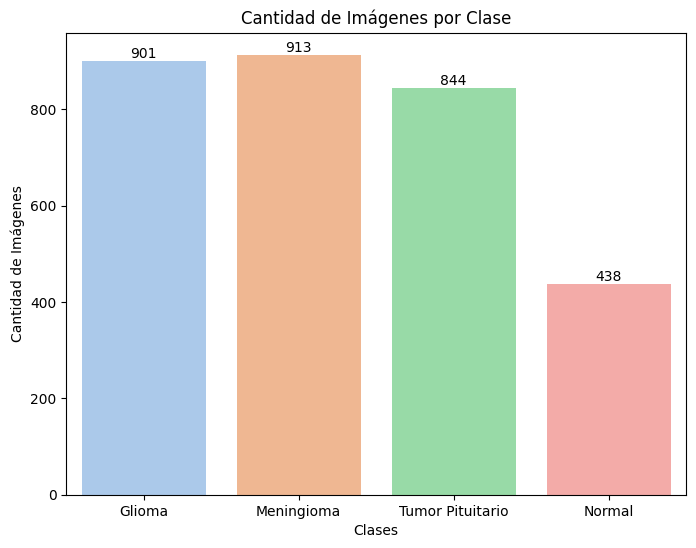

In [ ]:
cantidad_imagenes_por_clase = []
# Contar la cantidad de imágenes en cada clase
for carpeta in carpetas:
    carpeta_ruta = os.path.join(directorio_principal, carpeta)
    cantidad_imagenes = len(os.listdir(carpeta_ruta))
    cantidad_imagenes_por_clase.append(cantidad_imagenes)

# Etiquetas para las clases
etiquetas_clases = ['Glioma', 'Meningioma', 'Tumor Pituitario', 'Normal']

colores = sns.color_palette("pastel", len(etiquetas_clases))

# Histograma
plt.figure(figsize=(8, 6))
sns.barplot(x=etiquetas_clases, y=cantidad_imagenes_por_clase, palette=colores)
plt.xlabel('Clases')
plt.ylabel('Cantidad de Imágenes')
plt.title('Cantidad de Imágenes por Clase')

for i, cantidad in enumerate(cantidad_imagenes_por_clase):
    plt.text(i, cantidad, str(cantidad), ha='center', va='bottom')

plt.show()

Podemos observar que la distribución de las imágenes de tumores cerebrales es desigual. El gráfico muestra que hay una mayor proporción de imágenes de gliomas y meningiomas que de tumores pituitarios y cerebros sin ningún tumor.
Es importante tomar esto en cuenta ya que  puede plantear desafíos durante el desarrollo del modelo. La sobreabundancia de imágenes de Glioma y Meningioma podría influir en la capacidad del modelo para generalizar de manera efectiva a las clases menos representadas, como los tumores pituitarios y las imágenes normales.



## Data Wrangling

Para la preparación de datos, convertimos las imágenes a matrices y las normalizamos. La normalización de estas matrices es esencial para garantizar la consistencia en el tratamiento de los valores de píxeles, facilitando así un entrenamiento más efectivo de los modelos.

In [ ]:
# Listas para almacenar imágenes y etiquetas
imagenes = []
etiquetas = []
# Convertir imágenes en arrays y normalizar
for i, carpeta in enumerate(carpetas):
    carpeta_ruta = os.path.join(directorio_principal, carpeta)
    nombres_archivos = os.listdir(carpeta_ruta)
    for nombre_archivo in nombres_archivos:
        ruta_imagen = os.path.join(carpeta_ruta, nombre_archivo)
        imagen = Image.open(ruta_imagen)
        # Normalizar
        array_imagen = np.array(imagen) / 255.0
        imagenes.append(array_imagen)
        etiquetas.append(i)

imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

In [ ]:
print('Dimensión imágenes:', imagenes.shape)
print('Dimensión etiquetas:', etiquetas.shape)

Dimensión imágenes: (3096, 256, 256, 3)
Dimensión etiquetas: (3096,)


## Dataset final a trabajar

Decidimos utilizar este dataset debido a que tenemos interés en abordar un caso del área médica. Los tumores cerebrales nos parecen un tema bastante complejo, pero a la vez interesante.

Por medio del análisis exploratorio, pudimos apreciar que las clases están desbalanceadas, debido a la reducida cantidad de imágenes disponibles, por lo que decidimos investigar como abordar este problema de la mejor manera posible. Encontramos que, debido a la complejidad de los tumores cerebrales, es complicado aplicar técnicas de aumento de datos, ya que no suelen ser efectivas en el campo médico porque no aportan suficiente información adicional de manera natural.

Otro de los motivos por los cuales decidimos trabajar con estos datos, es que la gran mayoría de los conjuntos de datos públicos contienen una cantidad similar de imágenes a este dataset por temas de privacidad.


Por esta razón, hemos decidido trabajar con los datos obtenidos originalmente.